<div align="center">

# **CS-E4650 Methods of Data Mining**

# **Exercise 4.4 Core communities**

</div>

:<div align="center">
    
# **Group members**

# **Nguyen Xuan Binh (887799)**

# **Erald Shahinas (906845)**

# **Alexander Pavlyuk (906829)**

</div>

</br>
</br>
</br>

# **Table of Contents**

### 1. [Methods](#1)
### 2. [Algorithm](#2)
### 3. [Experiments on the Dolphin data](#3)
### 4. [Extra optional experiments](#4)
### 5. [Appendix](#5)

</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>

## **1. Methods**

All the calculations have been perfomed on JypyterHub (https://jupyter.cs.aalto.fi) in the Python notebook. Additionally, numpy (https://numpy.org/), matplotlib (https://matplotlib.org/), and pandas (https://pandas.pydata.org/) libraries have been imported to handle specific functions.


In [99]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

*Learning goals: How to find core communities in a social networks; designing
search algorithms for graph-form data.*

Let us notate a social network as graph $G = (V, E)$. One analysis task
is to find the core of the network consisting of tightly interconnected actors
(nodes) $S \subseteq V$. In this task, we use the following measure to evaluate
interconnectedness:

$$
ic(\mathbf{S}) = \frac{\sum_{i \in \textbf{S}} \sum_{j \in \textbf{S}} w(i, j)}{| \mathbf{S} |},
$$

where $w(i, j)$ is the weight of the edge between vertices $i$ and $j$, if it exists, and
$0$ otherwise, and $|\mathbf{S}|$ is the cardinality of the set $\mathbf{S}$. Note that in unweighted
graphs, $w(i, j) \in \{0, 1\}$.

Describe briefly the methods: how did you invent
the algorithm (e.g., searched literature, applied a method you knew from another context – and give references to possible sources), how did you estimate the lower-and upperbounds, what programming language
and tools you used in the implementation. If you made any extra experiments, tell them briefly.

**1.1 How we invent the algorithm**:

We have found out a good paper on this problem, called "A Fast and Exact Greedy Algorithm for the Core–Periphery Problem", which relates to this problem directly. The paper is available at this link

https://www.researchgate.net/publication/338379400_A_Fast_and_Exact_Greedy_Algorithm_for_the_Core-Periphery_Problem


This paper states that we can greedily choose the nodes with highest degree until a point where the score does not improve. Instead of the node degree, we simply replace it with the $ic$ measure. This serves as the intuitive baselinefor our pseudocode in the next section


**1.2 How do we estimate the lower and upper bound**:

- For lower bound of $ic$:

Assume that the graph we are going to study is a connected graph. Therefore, there exists a minimum spanning tree (MST) that will cover all nodes. In graph theory, the cardinality of the MST is $|N - 1|$, where N is the number of nodes in the graph (62 in this case). The lower bound of $ic$ would correspond to this MST subgraph, which means that

$$ ic(\mathbf{S})_{lower} = \frac{ |\mathbf{N-1}| } {|\mathbf{N}|}  $$

- For upper bound of $ic$:

Assume that all nodes have the maximum degree as the node of maximum degree, then the upper bound of $ic$ would correspond to the whole graph. Additionally, we should divide the number of edges by 2 to avoid repeating their count, which means that

$$ ic(\mathbf{S})_{upper} = \frac{ | \max{degree(v_{i \in {N}})}| } {|2 * \mathbf{N}|} $$

**1.3 Programming language and tools we use**:

We used Python for implementing the algorithms and Gephi for the graph visualization

**1.4 Extra experiments**:

No, we do not implement any extra experiments, as we are limited on time.

## **2. Algorithm**

(a) Propose a greedy algorithm to find a core $S \subseteq V$ with high $ic$. The algorithm does not need to find the globally optimal solution, but it should converge to a good local optimum. Describe here your algorithm. Give clear and compact pseudocode and explain the idea. Tell if there are any special assumptions or properties (e.g., if the result depends on the order of execution).

First of all, greediness in an algorithm implies that it is an iterative algorithm. Therefore, there are two strategies that we have arrived at, and here are their steps.

### **Top down approach strategy**

For a greedy top-down approach to maximize the interconnectedness measure $ic(S)$, we start with the entire set of nodes and iteratively remove nodes that result in the highest increase in $ic$

- Step 1: Initialize the full subset S: Start with the full set of nodes S comprising all nodes in the graph.

- Step 2: Iteratively remove nodes: At each step, evaluate the removal of each node currently in S. Calculate the resulting $ic$ value if that node is removed from the subset S.

- Step 3: Select the best node to remove: Remove the node that, when excluded, results in the highest $ic$ value (or the smallest decrease in $ic$ if all removals decrease $ic$).

- Step 4: Repeat the process: Continue removing nodes until no further removals increase the $ic$ value or all removals result in a decrease in $ic$.

- Step 5: Return the result: Once the process is complete, or further removals do not increase $ic$, return the pruned subset S and its $ic$ value.

### **Bottom-Up approach strategy**

For a greedy bottom-up approach to maximize the interconnectedness measure ic(S), we start with a subset of nodes
S containing any existing edge, and incrementally add nodes that increase ic the most at each step.


- Step 1: Initialize a subset S with two nodes as the endpoints of any existing edges.

- Step 2: Iteratively add nodes: At each step, evaluate the addition of each node not currently in S and calculate the resulting ic value if that node is added to the subset S

- Step 3: Select the best node to add: Add the node that, when included, results in the highest ic value.

- Step 4: Repeat the process: Continue adding nodes until no further additions increase the $ic$ value.

- Step 5: Return the result: Once the process is complete, return the subset S and its $ic$ value.

Both approaches are guaranteed to local optimum, since if we add or remove any node from subset S, the $ic$ score will strictly decrease.  

We also assume that this core of network needs not to be connected, as interconnectedness is measure stating how closely these nodes are related to each other, but there is no requirement explictly stating that this core must be a connected subgraph. Therefore, this core can consist of many smaller separate subgraphs, possibly known as "hubs".   

We now define the interconnected measure $ic$ as defined in the formula above, given the adjacency graph and the subsets of node S (np.array). S contain nodes name and start from 1 instead of 0.

In [100]:
def ic_measure(S, adjacency_matrix):
    # Adjust the nodes in S for 0-based indexing
    S_zero_indexed = [s - 1 for s in S]

    cardinal_S = len(S)
    if cardinal_S == 0:
        return 0
    # Calculate the sum of weights for unique edges within S

    sum_ic = 0
    for i in range(cardinal_S - 1):
        for j in range(i + 1, cardinal_S):
            node1 = S_zero_indexed[i]
            node2 = S_zero_indexed[j]
            sum_ic += adjacency_matrix[node1, node2]

    # Calculate the interconnectedness measure
    ic_value = sum_ic / cardinal_S

    return ic_value

#### Greedy top down approach

We implement the greedy top down approach algorithm to obtain at least a good local minimum result with high enough $ic$ score.

In [101]:
def greedy_top_down_ic(adjacency_matrix):

    print("Starting the greedy top down approach algorithm\n")

    # Initialize S with all nodes
    n = len(adjacency_matrix)
    S = list(range(1, n + 1))  # Using 1-based indexing

    # Initialize the maximum ic value
    max_ic = ic_measure(S, adjacency_matrix)

    # Flag to track if we should continue removing nodes
    continue_removal = True

    while continue_removal and len(S) > 1:
        print(f"Current size of subset S: {len(S)}")
        print(f"Current max ic measure: {round(max_ic, 4)}")
        continue_removal = False
        node_to_remove = None
        max_ic_this_round = 0

        # Try removing each node and check the new ic value
        for node in S:
            temp_S = [n for n in S if n != node]
            current_ic = ic_measure(temp_S, adjacency_matrix)
            #print(current_ic)

            # Find the node whose removal yields the highest ic
            if current_ic > max_ic_this_round:
                max_ic_this_round = current_ic
                node_to_remove = node

        # Compare the best ic value of this round with the overall max ic
        if max_ic_this_round > max_ic:
            max_ic = max_ic_this_round
            S.remove(node_to_remove)
            continue_removal = True

    print("\nNo more improvements can be made. Exiting the algorithm")

    return S, max_ic

#### Greedy bottum up approach

We implement the greedy bottom up approach algorithm to obtain at least a good local minimum result with high enough $ic$ score.

In [102]:
def greedy_bottom_up_ic(S_n_elements, adjacency_matrix):

    #print("Starting the greedy bottom up approach algorithm\n")

    n = len(adjacency_matrix)
    S = [i for i in S_n_elements]
    max_ic = 0

    # Flag to track if we should continue adding nodes
    continue_addition = True

    while continue_addition and len(S) < n:
        #print(f"Current size of subset S: {len(S)}")
        #print(f"Current max ic measure: {round(max_ic, 4)}")
        continue_addition = False
        node_to_add = None
        max_ic_this_round = 0

        all_nodes = list(range(1, n + 1))

        # Try adding each node not in S and check the new ic value
        for node in [node for node in all_nodes if node not in S]:  # Using 1-based indexing
            temp_S = S + [node]
            #print(temp_S)
            current_ic = ic_measure(temp_S, adjacency_matrix)

            # Find the node whose addition yields the highest ic
            if current_ic > max_ic_this_round:
                max_ic_this_round = current_ic
                node_to_add = node

        # Compare the best ic value of this round with the overall max ic
        if max_ic_this_round > max_ic:
            max_ic = max_ic_this_round
            S.append(node_to_add)
            #print(S)
            continue_addition = True

    return S, max_ic

Finally, we define a wrapping function for the bottom up method to consider all edges in the graph as the starting point for subset S

In [103]:
def greedy_bottom_up_all_pairs_ic(S_pairs, adjacency_matrix):
    pair_max_ic = 0
    optimal_S_pair = None
    optimal_S = None

    for S_pair in S_pairs:
        # print(S_pair)

        current_S, current_max_ic = greedy_bottom_up_ic(S_pair, adjacency_matrix)
        if current_max_ic > pair_max_ic:
            print(f"Found a better base edge: {S_pair}")
            print(f"Current pair max ic: {current_max_ic}")
            pair_max_ic = current_max_ic
            optimal_S_pair = S_pair
            optimal_S = current_S

    return optimal_S, optimal_S_pair, max_ic_value

## **3. Experiments on the Dolphin data**

(b) Load the Dolphin data (dolphins.txt) from MyCourses. The first line tells the number of nodes and each subsequent line indicates the two endpoints of an undirected edge. Estimate some reasonable lower and upper bounds of $ic$ for the optimal core in the Dolphin data (these can be used to estimate goodness of your solution)

Describe here results of your experiments on the Dolphins data, including lower- and upperbounds on $ic$, the actual result, its visualization, and your conclusions on the quality.



In [104]:
# First, we compose the adjacency matrix for the dolphins data

file_path = 'dolphins.txt'

with open(file_path, 'r') as file:
    dolphin_data = file.readlines()

number_of_nodes = int(dolphin_data[0])
# Creating an adjacency matrix for the dolphin graph
adjacency_matrix = np.zeros((number_of_nodes, number_of_nodes))

S_pairs = []
# Filling the adjacency matrix based on the edges in the dolphin_data
# We skip the first line as it's the number of nodes
for line in dolphin_data[1:]:
    node1, node2 = map(int, line.split())
    S_pairs.append([node1, node2])
    adjacency_matrix[node1 - 1, node2 - 1] = 1
    adjacency_matrix[node2 - 1, node1 - 1] = 1  # Symmetric for undirected graph

print(f"The number of nodes are {int(number_of_nodes)}")
print(f"The number of edges are {int(adjacency_matrix.sum()/2)}")

print("\nThe adjacency matrix is")
print(adjacency_matrix)

# Calculate the degree of each node
degrees = np.sum(adjacency_matrix, axis=1)

# Find the node with the largest degree
max_degree = np.max(degrees)
node_with_largest_degree = np.argmax(degrees) + 1  # Adding 1 for 1-based indexing

print(f"\nNode with the largest degree: {node_with_largest_degree}. Its degree is {int(max_degree)}")


print("\nExample of ic measure for dummy subset nodes: ")
S_list = [1, 5, 10, 20, 25, 30, 35, 40, 45, 50]
# S_list = list(range(1, 63))
print(f"S = {S_list}")
print(f"ic = {ic_measure(S_list, adjacency_matrix)}")


The number of nodes are 62
The number of edges are 159

The adjacency matrix is
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]

Node with the largest degree: 15. Its degree is 12

Example of ic measure for dummy subset nodes: 
S = [1, 5, 10, 20, 25, 30, 35, 40, 45, 50]
ic = 0.3


#### Upper and lower bound implementation

We calculate the upper bound and lower bound heuristics for the $ic$ measure

In [105]:
lowerbound = (number_of_nodes - 1)/number_of_nodes

print(f"The lower bound for ic measure is {round(lowerbound, 4)}")

# Estimated sum of degrees based on max degree
estimated_sum_degrees = (number_of_nodes * max_degree)/2

upperbound = estimated_sum_degrees / (number_of_nodes)  # Divide by 2 to account for double counting of edges
print(f"The upper bound for ic measure is {round(upperbound, 4)}")

The lower bound for ic measure is 0.9839
The upper bound for ic measure is 6.0


(c) Apply your algorithm on the Dolphin data. As a result, provide the maximum $ic$ you achieved and the vertices of the corresponding subgraph (in ascending order).

In [106]:
optimal_S_top_down, max_ic_value = greedy_top_down_ic(adjacency_matrix)

print("\nThe optimal subset S found by greedy top-down approach is: ")
print(np.sort(optimal_S_top_down))

Starting the greedy top down approach algorithm

Current size of subset S: 62
Current max ic measure: 2.5645
Current size of subset S: 61
Current max ic measure: 2.5902
Current size of subset S: 60
Current max ic measure: 2.6167
Current size of subset S: 59
Current max ic measure: 2.6441
Current size of subset S: 58
Current max ic measure: 2.6724
Current size of subset S: 57
Current max ic measure: 2.7018
Current size of subset S: 56
Current max ic measure: 2.7321
Current size of subset S: 55
Current max ic measure: 2.7636
Current size of subset S: 54
Current max ic measure: 2.7963
Current size of subset S: 53
Current max ic measure: 2.8302
Current size of subset S: 52
Current max ic measure: 2.8462
Current size of subset S: 51
Current max ic measure: 2.8627
Current size of subset S: 50
Current max ic measure: 2.88
Current size of subset S: 49
Current max ic measure: 2.9184
Current size of subset S: 48
Current max ic measure: 2.9375
Current size of subset S: 47
Current max ic measure: 

In [107]:
optimal_S, max_ic_value = greedy_bottom_up_ic([1, 11], adjacency_matrix)

print("\nThe optimal subset S found by greedy bottom-up approach is (considering from edge 1-11 as the base): ")
print(np.sort(optimal_S))


The optimal subset S found by greedy bottom-up approach is (considering from edge 1-11 as the base): 
[ 1  3  4  9 11 15 16 17 19 21 22 25 29 30 31 34 35 37 38 39 41 43 44 45
 46 48 51 52 53 60]


In [108]:
optimal_S_bottom_up, optimal_S_pair, max_ic_value = greedy_bottom_up_all_pairs_ic(S_pairs, adjacency_matrix)

print("\nThe optimal subset S found by greedy bottom-up approach considering all edges candidate is: ")
print(np.sort(optimal_S_bottom_up))
print(f"The base edge is {optimal_S_pair}")

Found a better base edge: [11, 1]
Current pair max ic: 3.066666666666667
Found a better base edge: [9, 4]
Current pair max ic: 3.0952380952380953

The optimal subset S found by greedy bottom-up approach considering all edges candidate is: 
[ 4  9 15 16 17 19 21 22 25 30 34 37 38 39 41 44 46 51 52 53 60]
The base edge is [9, 4]


Therefore, the optimal subset S that we have found is produced by the bottom-up approach, and its $ic$ value is 3.0952. Interestingly, this value lies right between the lower bound (0.98) and upper bound (6.0). Since both bounds are a little unrealistic considering all nodes having either minimum degree or maximum degree, we cannot really judge how good our optimal $ic$ value is compared to the global optimal solution. However, if the upper bound is calculated via the average node degree (around 7), then the upper bound becomes 3.5. We observe that our local optimum solution ($ic=$3.095) is actually quite close to this bound, so we believe that the solution found by bottom-up approach is at least a decently good candidate for the core of the dolphin community.  

(d) Visualize the graph using different colour for the core nodes S. For visualization, you can use Gephi (https://gephi.org/). What is your conclusion, does your solution capture the interconnected core well?

We save all undirected edges in a csv file again, however this time we distinguish between the edges that are connecting the core nodes (in green) and the ones that are not (in red).

In [109]:
with open('dolphins_gephi_subgraph.csv', 'w') as f:
    f.write('Source,Target,Subgraph\n')
    for i, j in S_pairs:
        if i in optimal_S_bottom_up and j in optimal_S_bottom_up:
            f.write(f'{i},{j},1\n')
        else:
            f.write(f'{i},{j},0\n')

The csv file is then loaded into Gephi, where we display it as an undirected graph. From the Appearance panel we partition the graph by the subgraph attribute.

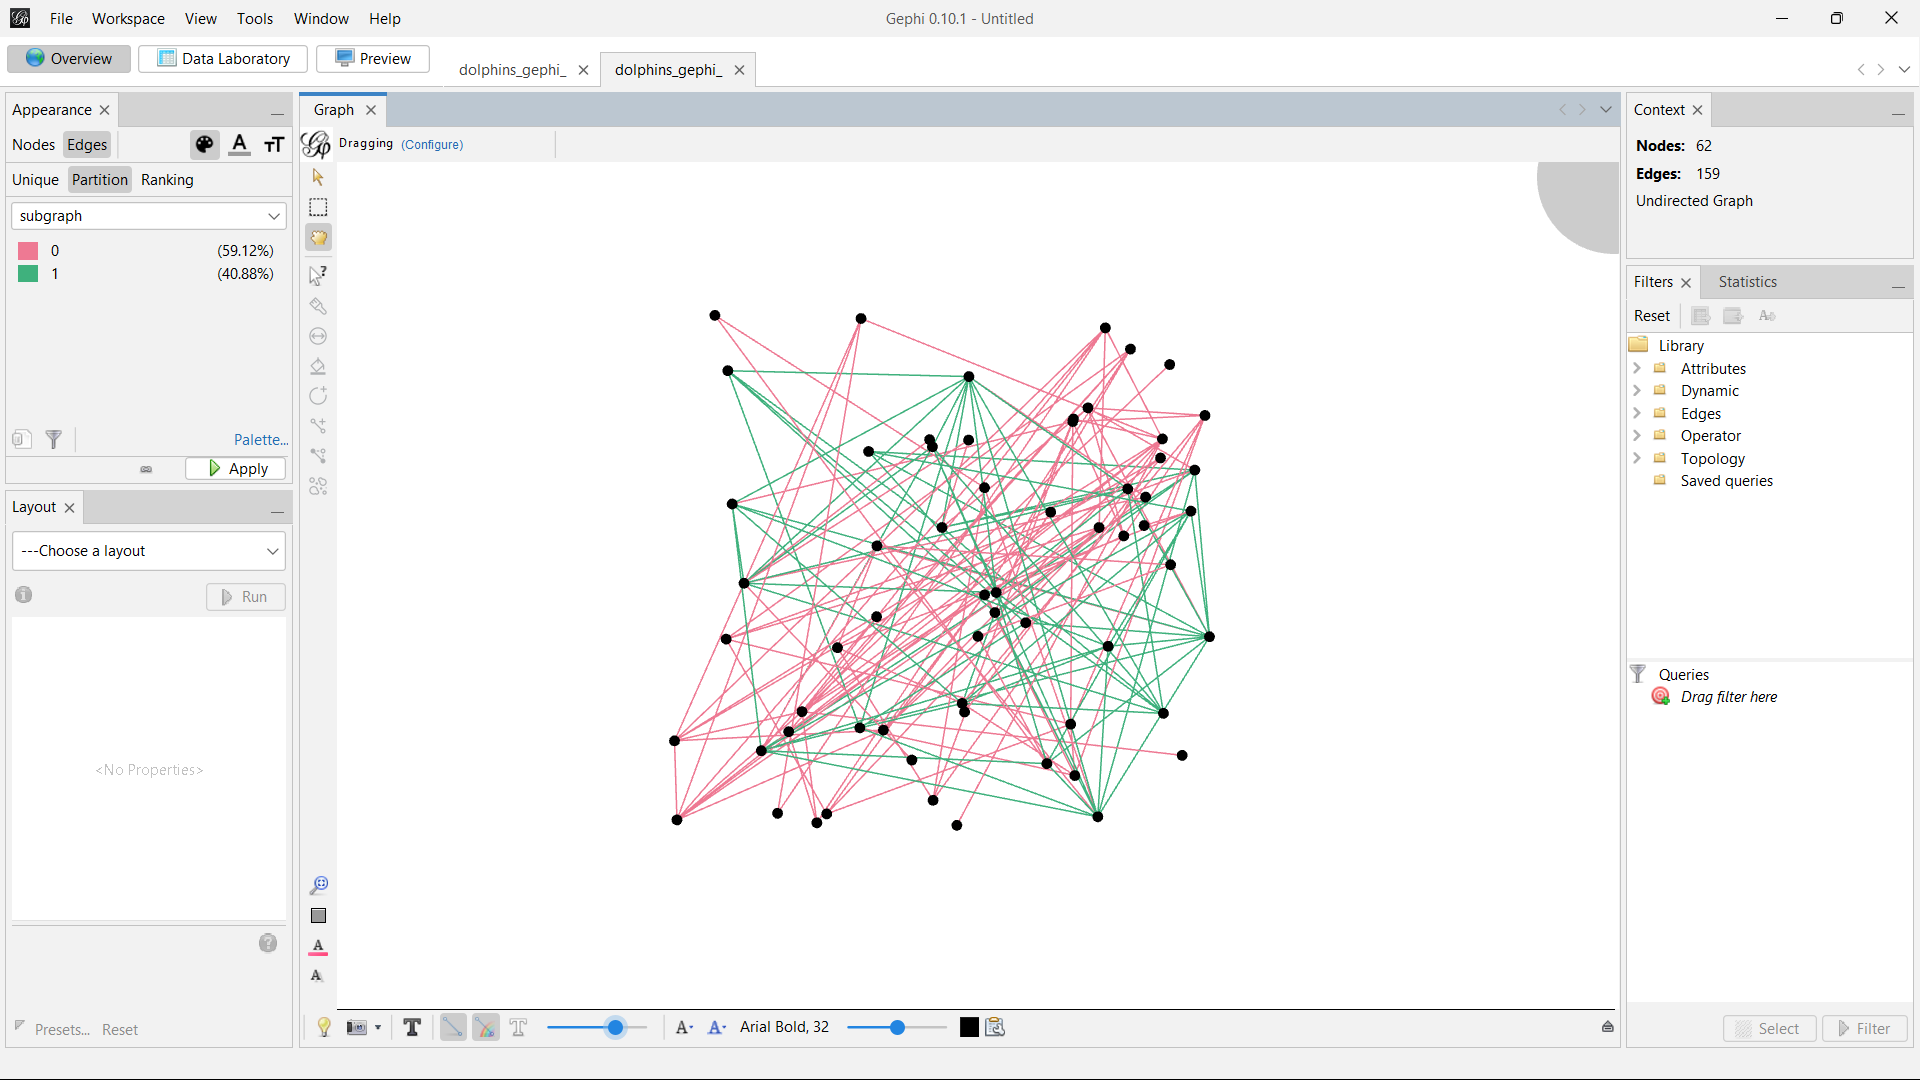

From the graph we can see that our solution does indeed capture the interconnected core well

## **Appendix**

All the code for this exercise has been added with respect to each part for closest referencing. Therefore, we do not attach any more code here in the Appendix section